In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
handle = 'real_eco_speczerrs'
dire = f'/srv/two/zhutchen/paper3/catalogs/{handle}/'

In [55]:
catnames = os.listdir(dire)
nn = len(catnames)
Pth = np.zeros(nn)
cbar_tr = np.zeros(nn)
cbar_rt = np.zeros(nn)
pbar_tr = np.zeros(nn)
pbar_rt = np.zeros(nn)


exclude_Neq1 = 
statistic = np.mean

for i,ff in enumerate(catnames):
    catalog = pd.read_csv(dire+ff)
    catalog = catalog[(catalog.absrmag<=-17.33)]

    Pth[i] = catalog.Pth.iloc[0]
    cbar_tr[i] = statistic(catalog.C_TR)
    cbar_rt[i] = statistic(catalog.C_RT)
    pbar_tr[i] = statistic(catalog.P_TR)
    pbar_rt[i] = statistic(catalog.P_RT)

optimal_pth_ptimesc_tr = Pth[np.argmax(pbar_tr*cbar_tr)]
optimal_pth_ptimesc_rt = Pth[np.argmax(pbar_rt*cbar_rt)]

In [56]:
labels = {
    'c_tr' : r'$C_{TR}$',
    'p_tr' : r'$P_{TR}$',
    'c_rt' : r'$C_{RT}$',
    'p_rt' : r'$P_{RT}$',
    'ptimesc_tr' : r'$P_{TR}\times C_{TR}$',
    'ptimesc_rt' : r'$P_{RT}\times C_{RT}$',
}

In [57]:
# fig, axs = plt.subplots(ncols=2, figsize=(7.5,4.38*0.7))
# axs[0].hist(catalog.czerr)

# axs[1].plot(Pth, cbar_tr, 'g*', label=labels['c_tr'])
# axs[1].scatter(Pth, pbar_tr, color='purple', marker='D', edgecolor='purple', facecolor="None", label=labels['p_tr'])
# axs[1].scatter(Pth, cbar_rt, color='k', marker='.', label=labels['c_rt'])
# axs[1].scatter(Pth, pbar_rt, color='gray', marker='x', label=labels['p_rt'])
# axs[1].plot(Pth, pbar_tr*cbar_tr, 'b-', alpha=0.7, label=labels['ptimesc_tr'])
# axs[1].plot(Pth, pbar_rt*cbar_rt, 'r-', alpha=0.7, label=labels['ptimesc_rt'])
# axs[1].legend(loc='best')

# plt.show()

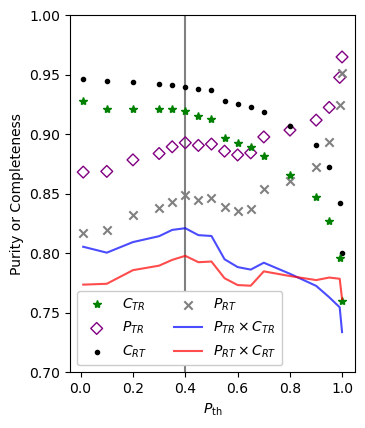

In [65]:
plt.figure(figsize=(3.75,4.38))
plt.axvline(optimal_pth_ptimesc_rt, color='gray', zorder=0)
plt.plot(Pth, cbar_tr, 'g*', label=labels['c_tr'])
plt.scatter(Pth, pbar_tr, color='purple', marker='D', edgecolor='purple', facecolor="None", label=labels['p_tr'])
plt.scatter(Pth, cbar_rt, color='k', marker='.', label=labels['c_rt'])
plt.scatter(Pth, pbar_rt, color='gray', marker='x', label=labels['p_rt'])
plt.plot(Pth, pbar_tr*cbar_tr, 'b-', alpha=0.7, label=labels['ptimesc_tr'])
plt.plot(Pth, pbar_rt*cbar_rt, 'r-', alpha=0.7, label=labels['ptimesc_rt'])
plt.xlabel(r'$P_{\rm th}$')
plt.ylabel('Purity or Completeness')
plt.ylim(0.7,1)
plt.legend(loc='best', ncols=2, framealpha=1)
plt.tight_layout()
plt.show()

0.4 0.4
